<a href="https://colab.research.google.com/github/skartxy/my-first-blog/blob/master/DL_Paneles_Solares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Informe de Detección de Objetos con YOLOv5**

## **Definición del Problema**
En el contexto del sector energético, la eficiencia y el mantenimiento adecuado de las infraestructuras de energía renovable son fundamentales. Uno de los componentes clave en la generación de energía solar son los paneles solares. La detección temprana de problemas en estos paneles es crucial para mantener su eficiencia y prolongar su vida útil.

El problema específico que queremos resolver con este modelo de detección de objetos es la identificación y clasificación de paneles solares en diferentes estados de mantenimiento. Nuestro objetivo es crear un modelo que pueda detectar y clasificar automáticamente los paneles solares en tres categorías distintas:

1. **Panel Solar Sucio**: Paneles solares que tienen una
acumulación significativa de suciedad, polvo u otros contaminantes en su superficie, lo que puede reducir su eficiencia.

2. **Panel Solar Roto**: Paneles solares que presentan daños físicos, como grietas o roturas, que pueden afectar gravemente su funcionamiento.

3. **Panel Solar en Buen Estado**: Paneles solares que están limpios y en buen estado, funcionando de manera óptima.

## **Justificación del Problema**
La limpieza y el mantenimiento de los paneles solares son tareas que suelen realizarse manualmente y de manera periódica. Sin embargo, estos métodos pueden ser ineficientes y no siempre detectan problemas a tiempo. Un sistema automatizado de detección y clasificación de paneles solares permite:

* **Mantenimiento Proactivo**: Identificar paneles sucios o dañados antes de que su eficiencia se vea significativamente afectada.
* **Reducción de Costos**: Minimizar los costos de mantenimiento mediante la priorización de los paneles que realmente necesitan limpieza o reparación.
* **Optimización del Rendimiento**: Mantener un rendimiento óptimo de los sistemas solares mediante la detección y corrección oportuna de problemas.

El modelo de detección de objetos personalizado que hemos creado con YOLOv5 tiene como objetivo resolver este problema de manera eficiente, permitiendo una supervisión continua y precisa de los paneles solares, contribuyendo así a una mayor sostenibilidad y eficiencia en el uso de energía solar.

## **Creación / Obtención del Dataset**
Para entrenar nuestro modelo de detección de objetos, hemos utilizado un dataset compuesto por imágenes de paneles solares en tres estados diferentes: sucios, rotos y en buen estado. A continuación, se detallan los pasos seguidos para la creación y obtención del dataset:

1. **Recopilación de Imágenes**
* Las imágenes fueron obtenidas de Kaggle. Se seleccionaron imágenes de paneles solares que representaban claramente los tres estados mencionados (sucios, rotos y en buen estado).
2. **Anotación de Imágenes**
* Utilizamos la herramienta Make Sense para anotar las imágenes. Esta herramienta facilita la creación de anotaciones en el formato YOLO, que es necesario para el entrenamiento del modelo.
* En total, se anotaron 93 imágenes: 72 imágenes para el conjunto de entrenamiento (train) y 21 imágenes para el conjunto de validación (val).
3. **Estructura del Dataset**
El dataset fue organizado de la siguiente manera:
* *data/images/train*: Contiene las 72 imágenes utilizadas para entrenar el modelo.
* *data/images/val*: Contiene las 21 imágenes utilizadas para validar el modelo.
* *data/labels/train*: Contiene los archivos de anotaciones correspondientes a las imágenes de entrenamiento en formato YOLO.
* *data/labels/val*: Contiene los archivos de anotaciones correspondientes a las imágenes de validación en formato YOLO.

## **Proceso de entrenamiento del modelo**
Se documenta el proceso paso a paso:

### **Paso 1: Subir el Dataset**
**Explicación:**
Primero, subimos el archivo comprimido (data.zip) que contiene nuestro dataset a Google Colab. Utilizamos la función files.upload() para seleccionar y subir el archivo desde el ordenador.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.zip to data.zip


### **Paso 2: Listar Archivos y Verificar Estructura**
**Explicación:**
Cambiamos el directorio de trabajo a /content/ y listamos los archivos en el directorio actual para asegurarnos de que data.zip se haya subido correctamente. También verificamos la estructura del dataset descomprimido para asegurarnos de que las imágenes y anotaciones estén en las carpetas correctas.

In [ ]:
# Listar archivos en el directorio actual
%cd /content/

!ls

/content
data  data.zip	yolov5


In [ ]:
# Verificar estructura de directorios y archivos
!ls data/images/train
!ls data/images/val
!ls data/labels/train
!ls data/labels/val

 08-RE-Mike-Solar-PV-fig-05-490x620.jpg
 133760080-broken-destroyed-solar-panel.jpg
'1479285761 (1).jpg'
'20210916_130258_29_11zon - copia.jpg'
 20210916_130303_31_11zon.jpg
'20210916_130313_33_11zon - copia.jpg'
 20210916_130934_103_11zon.jpg
 20210917_151202.jpg
'20210917_151218(0).jpg'
 20210917_151218.jpg
 20210917_151224_3_11zon_37_11zon_29_11zon_26_11zon.jpg
 20210917_151224.jpg
 20210917_151230.jpg
 20210917_151528.jpg
 20210917_151529.jpg
 20210917_151530.jpg
 20210917_151539.jpg
 20210917_151541.jpg
'20210917_151542(0).jpg'
 20210920_171107.jpg
 20210920_171109.jpg
 20210920_171423.jpg
 20210920_171433.jpg
 20210920_171434.jpg
 20210920_171436.jpg
 Broken-solar-panel-1024x512.jpg
 Broken_Solar_Panel_and_Solar_Cell.jpg
 broken_solar_panel_shattered_glass_02_impact_spot.jpg
 crack-10.PNG
 crack-12.PNG
 crack-13.PNG
 crack-15.PNG
 crack-16.PNG
 crack-19.PNG
 crack-1.PNG
 crack-20.PNG
 crack-22.PNG
 crack-24.PNG
 crack-25.PNG
 crack-26.PNG
 crack-27.PNG
 crack-28.PNG
 crack-29.PNG

### **Paso 3: Clonar el Repositorio YOLOv5 e Instalar Dependencias**
**Explicación:**
Clonamos el repositorio de YOLOv5 desde GitHub y cambiamos el directorio de trabajo al nuevo directorio yolov5. Luego, instalamos todas las dependencias necesarias utilizando el archivo requirements.txt.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install


Cloning into 'yolov5'...
remote: Enumerating objects: 16634, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 16634 (delta 70), reused 106 (delta 47), pack-reused 16459
Receiving objects: 100% (16634/16634), 15.34 MiB | 20.86 MiB/s, done.
Resolving deltas: 100% (11369/11369), done.
/content/yolov5/yolov5


### **Paso 4: Inicializar YOLOv5 y Crear el Archivo personalizado.yaml**
**Explicación:**
Inicializamos YOLOv5 y verificamos que todo esté configurado correctamente. Luego, creamos el archivo personalizado.yaml, que contiene la configuración de las rutas a los datos de entrenamiento y validación, el número de clases y los nombres de las clases.

In [ ]:
import torch
import utils
display = utils.notebook_init()
# Crear el archivo 'personalizado.yaml'
yaml_content = """
train: ../data/images/train
val: ../data/images/val

nc: 3  # Número de clases

names: ['panel_solar_sucio', 'panel_solar_roto', 'panel_solar_buen_estado']  # Nombres de las clases
"""

with open('data/personalizado.yaml', 'w') as file:
    file.write(yaml_content)

YOLOv5 🚀 v7.0-323-gdfdfbcf3 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)


Setup complete ✅ (12 CPUs, 53.0 GB RAM, 31.4/201.2 GB disk)


### **Paso 5: Entrenar el Modelo**
**Explicación:**
Ejecutamos el entrenamiento del modelo YOLOv5 utilizando el script train.py.

#### **Modelo 3 épocas**
En una primera fase, entrenamos el modelo por 3 épocas para asegurarnos de que todo funcione correctamente.

In [ ]:
!python train.py --img 640 --batch 16 --epochs 3 --data data/personalizado.yaml --weights yolov5s.pt --cache

2024-06-17 00:10:36.654602: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 00:10:36.654684: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 00:10:36.656644: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=data/personalizado.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=

#### **Modelo 50 épocas**
Luego, continuamos el entrenamiento por 50 épocas para ajustar los pesos del modelo de manera más precisa.

In [ ]:
!python train.py --img 640 --batch 16 --epochs 50 --data data/personalizado.yaml --weights yolov5s.pt --cache


2024-06-17 00:02:54.424588: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 00:02:54.424657: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 00:02:54.426583: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=data/personalizado.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls

## **Informe de resultados del modelo**

### **Parte 1: Datos Objetivos Obtenidos**
Después de completar el entrenamiento del modelo YOLOv5 con 50 épocas, se obtuvieron las siguientes métricas de evaluación:






#### **Métricas Generales**

* Precisión (P) = 0.783
* Recall (R) = 0.333
* mAP 50	= 0.365
* mAP 50-95 = 0.253

#### **Métricas por Clase**

**1. Panel Solar Sucio**
* Precisión = 1.0
* Recall = 0.0
* mAP 50	= 0.0523
* mAP 50-95 = 0.0379

**2. Panel Solar Roto**

* Precisión = 0.575
* Recall = 0.375
* mAP 50	= 0.399
* mAP 50-95 = 0.231

**3. Panel Solar en Buen Estado**

* Precisión = 0.774
* Recall = 0.625
* mAP 50	= 0.644
* mAP 50-95 = 0.489

#### **Resultados Visuales**
Las imágenes y gráficos que se presentan a continuación se han extraído de la dirección *yolov5/runs/train/exp2*, donde el modelo YOLOv5 guarda los resultados del entrenamiento y validación.

In [ ]:

# Listar los directorios en runs/train
%cd /content/

/content


In [ ]:
!ls yolov5/runs/train/exp2

confusion_matrix.png				     opt.yaml	   train_batch0.jpg
events.out.tfevents.1718582577.e43eed395ecd.20473.0  P_curve.png   train_batch1.jpg
F1_curve.png					     PR_curve.png  train_batch2.jpg
hyp.yaml					     R_curve.png   val_batch0_labels.jpg
labels_correlogram.jpg				     results.csv   val_batch0_pred.jpg
labels.jpg					     results.png   weights


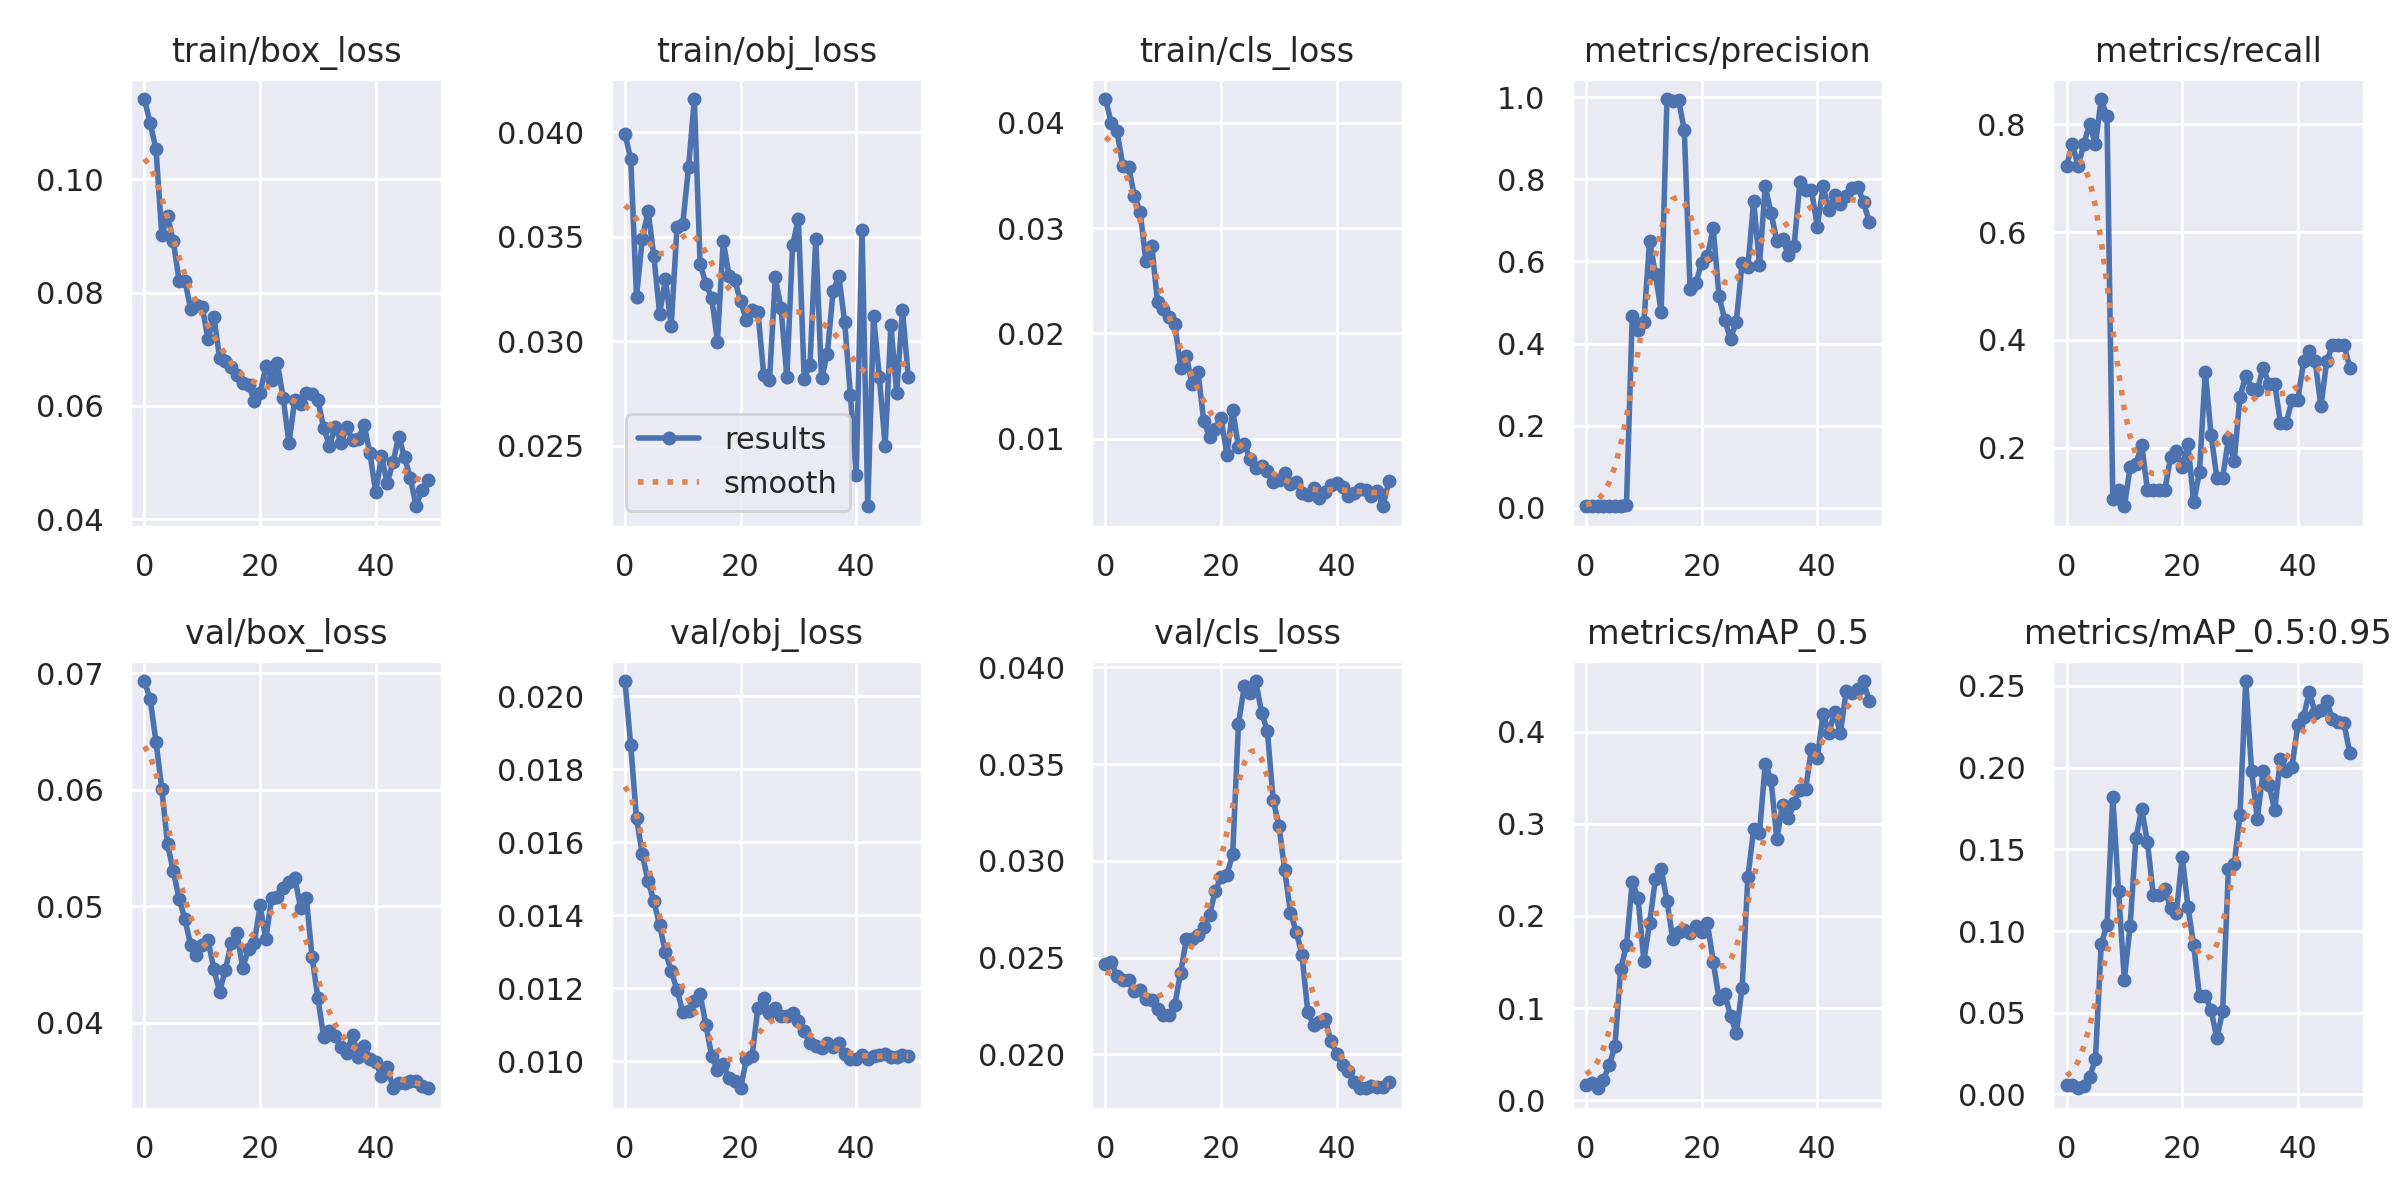

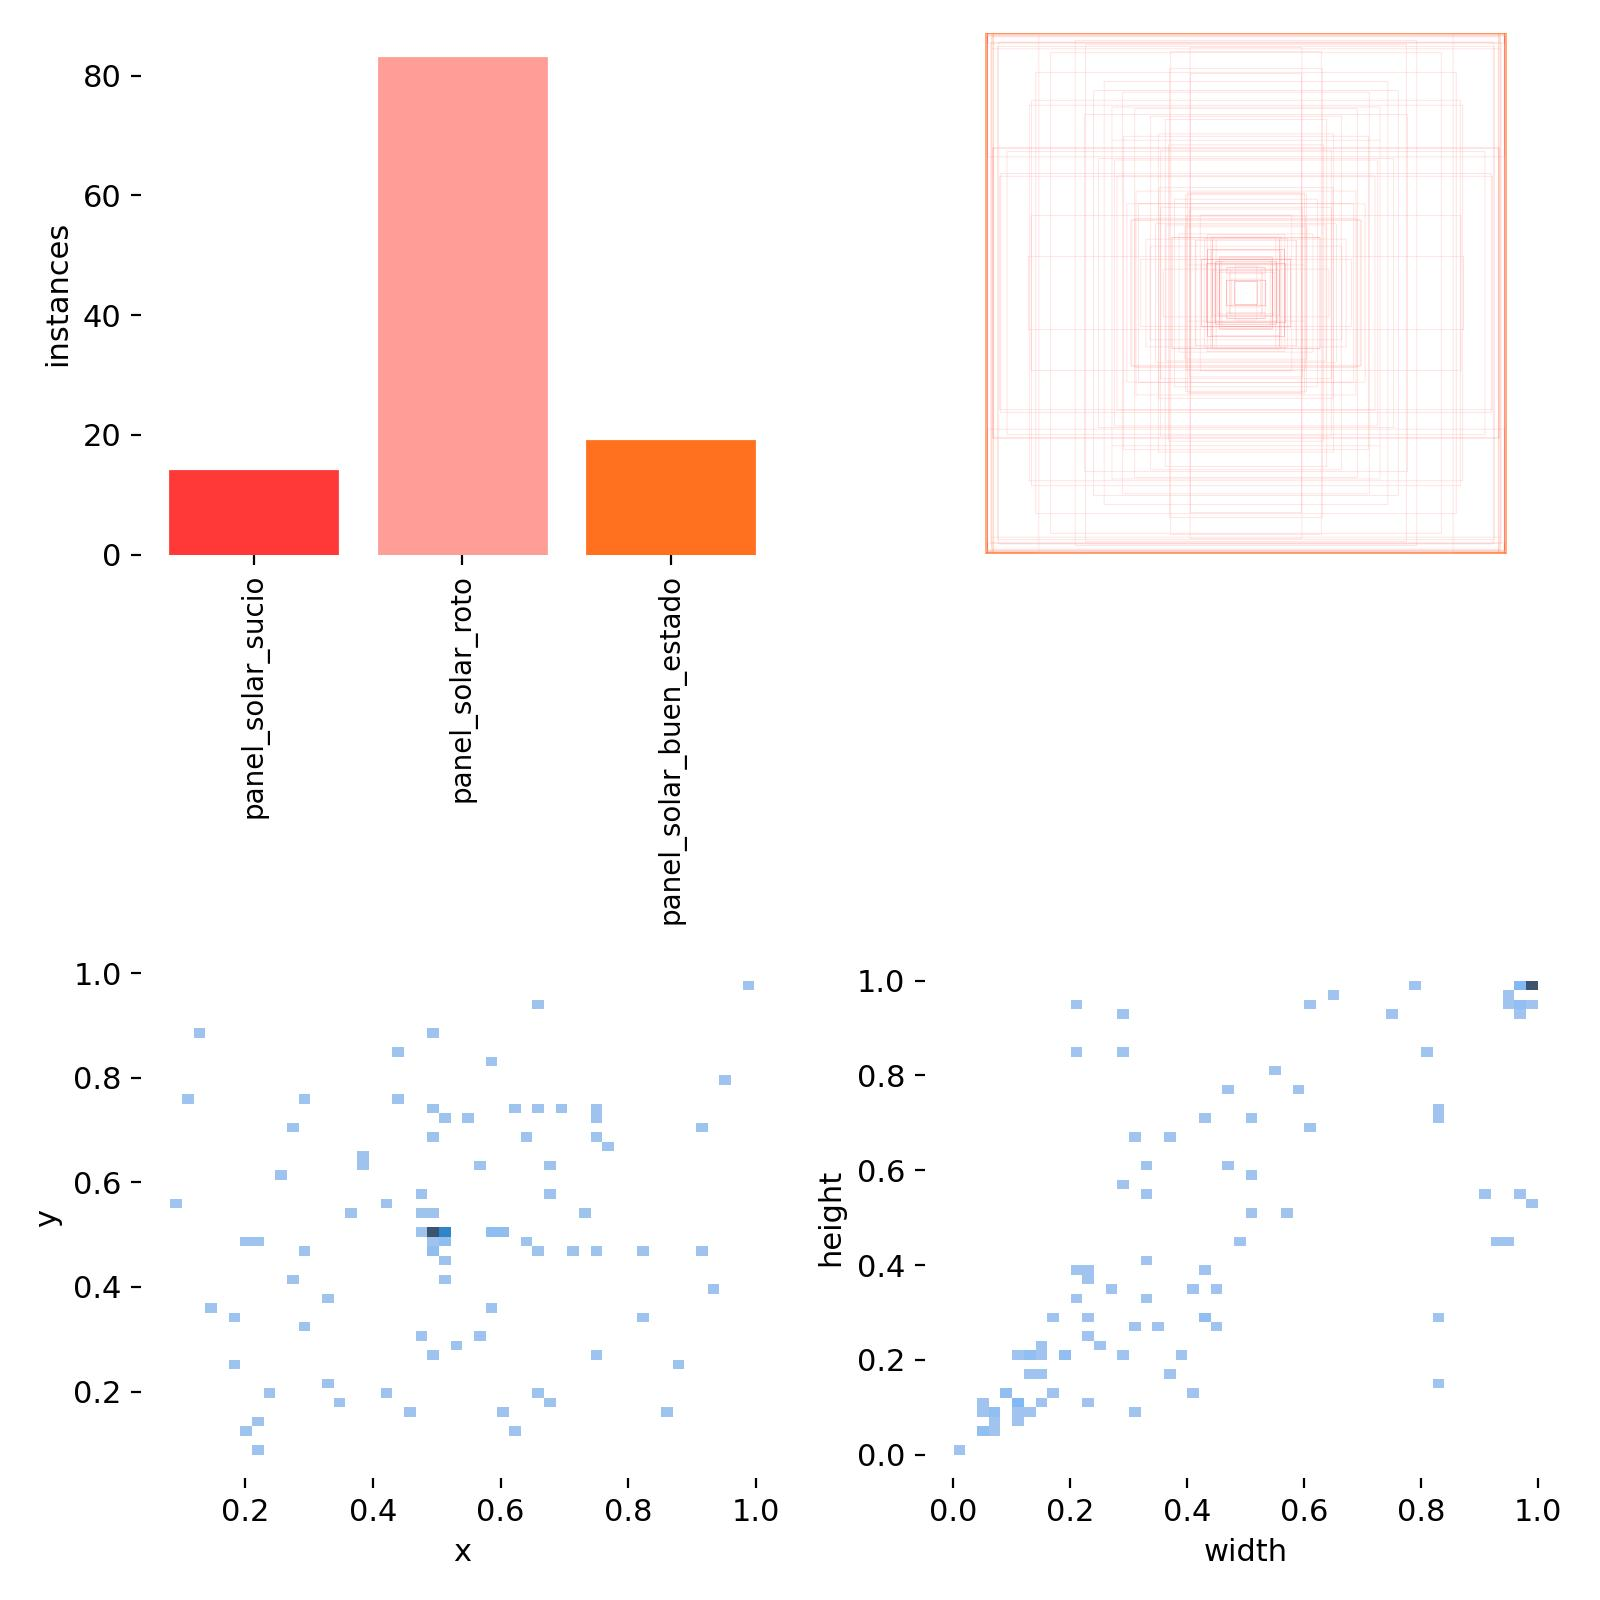

In [ ]:
from IPython.display import Image, display

# Mostrar el gráfico de resultados de entrenamiento y validación
display(Image(filename='yolov5/runs/train/exp2/results.png'))

# Mostrar ejemplos de detección
display(Image(filename='yolov5/runs/train/exp2/labels.jpg'))

### **Parte 2: Análisis de los Resultados**
Los resultados obtenidos muestran varias métricas clave que nos permiten evaluar el rendimiento del modelo en la detección y clasificación de paneles solares en diferentes estados.



#### **Interpretación de las Métricas**

* Precisión (P): La precisión general del modelo es de 0.783, lo que indica que el modelo tiene una buena capacidad para identificar correctamente los paneles solares en la mayoría de los casos.

* Recall (R): El recall general es de 0.333, lo que sugiere que el modelo puede estar omitiendo algunos paneles solares que deberían ser detectados.

* mAP 50: La media de precisión promedio al umbral de 0.5 es de 0.365, lo que proporciona una visión general de la efectividad del modelo en la detección de objetos.

* mAP 50-95: La media de precisión promedio a varios umbrales (de 0.5 a 0.95) es de 0.253, lo que refleja la capacidad del modelo para detectar objetos con precisión en diferentes umbrales de IoU.

#### **Evaluación por Clase**

**1. Panel Solar Sucio:**

* Precisión: 1.0, lo que significa que todas las detecciones de paneles solares sucios son correctas.
* Recall: 0.0, lo que indica que el modelo no está detectando paneles solares sucios en la validación.

**Evaluación:** Estos resultados no son satisfactorios ya que el recall es 0.0. El modelo no está identificando paneles sucios en las imágenes de validación, lo que podría ser debido a una falta de datos suficientes o anotaciones incorrectas para esta clase.

**2. Panel Solar Roto:**

* Precisión: 0.575, lo que indica una moderada capacidad de detección correcta.
* Recall: 0.375, lo que sugiere que el modelo está omitiendo algunas detecciones.

**Evaluación:** Aunque la precisión es aceptable, el recall necesita mejorar. Esto indica que el modelo tiene potencial, pero necesita más datos de entrenamiento y ajustes adicionales.

**3. Panel Solar en Buen Estado:**

* Precisión: 0.774, una buena capacidad para detectar paneles en buen estado.
* Recall: 0.625, lo que muestra que el modelo está detectando la mayoría de los paneles en buen estado.

**Evaluación:** Estos resultados son bastante buenos, indicando que el modelo es efectivo en la detección de paneles en buen estado.

## **Inferencia del Modelo**
El proceso de inferencia del modelo YOLOv5 entrenado se realizó utilizando 1 imagen por cada categoría:

* Caso 1: Panel Solar en Buen Estado
* Caso 2: Panel Solar Sucio
* Caso 3: Panel Solar Roto

A continuación se detallan los pasos seguidos para ejecutar la inferencia:




### **Paso 1: Cargar el Modelo Entrenado**
Para realizar la inferencia, cargamos los pesos del modelo entrenado. Estos pesos se guardaron en *runs/train/exp2/weights/best.pt* durante el proceso de entrenamiento.

In [ ]:
# Asegurarse de estar en el directorio correcto
%cd /content/yolov5

# Listar el contenido del directorio runs/train/exp2 para confirmar que los pesos están ahí
!ls runs/train/exp2/weights

/content/yolov5
best.pt  last.pt


### **Paso 2: Evaluación de cada caso**



#### **Caso 1: Panel Solar en Buen Estado**

##### **Seleccionar Imagen de Prueba**

In [ ]:
from google.colab import files

# Subir nuevas imágenes o vídeos para la inferencia
uploaded = files.upload()

Saving 20210917_151349_11_11zon_42_11zon.jpg to 20210917_151349_11_11zon_42_11zon.jpg


##### **Ejecutar la Inferencia**

Se ejecuta la inferencia utilizando el script de detección de YOLOv5. El script toma como entrada los pesos del modelo entrenado y la nueva imagen, y realiza las detecciones de objetos.

In [ ]:
# Realizar inferencia en las nuevas imágenes subidas
!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --conf 0.25 --source /content/yolov5/20210917_151349_11_11zon_42_11zon.jpg

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/yolov5/20210917_151349_11_11zon_42_11zon.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-323-gdfdfbcf3 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/20210917_151349_11_11zon_42_11zon.jpg: 480x640 1 panel_solar_buen_estado, 104.3ms
Speed: 0.7ms pre-process, 104.3ms inference, 587.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


##### **Visualizar los Resultados**

Los resultados de la inferencia se guardaron en el directorio *runs/detect/exp2*.
A continuación, se muestran la imagen con las detecciones realizadas por el modelo:

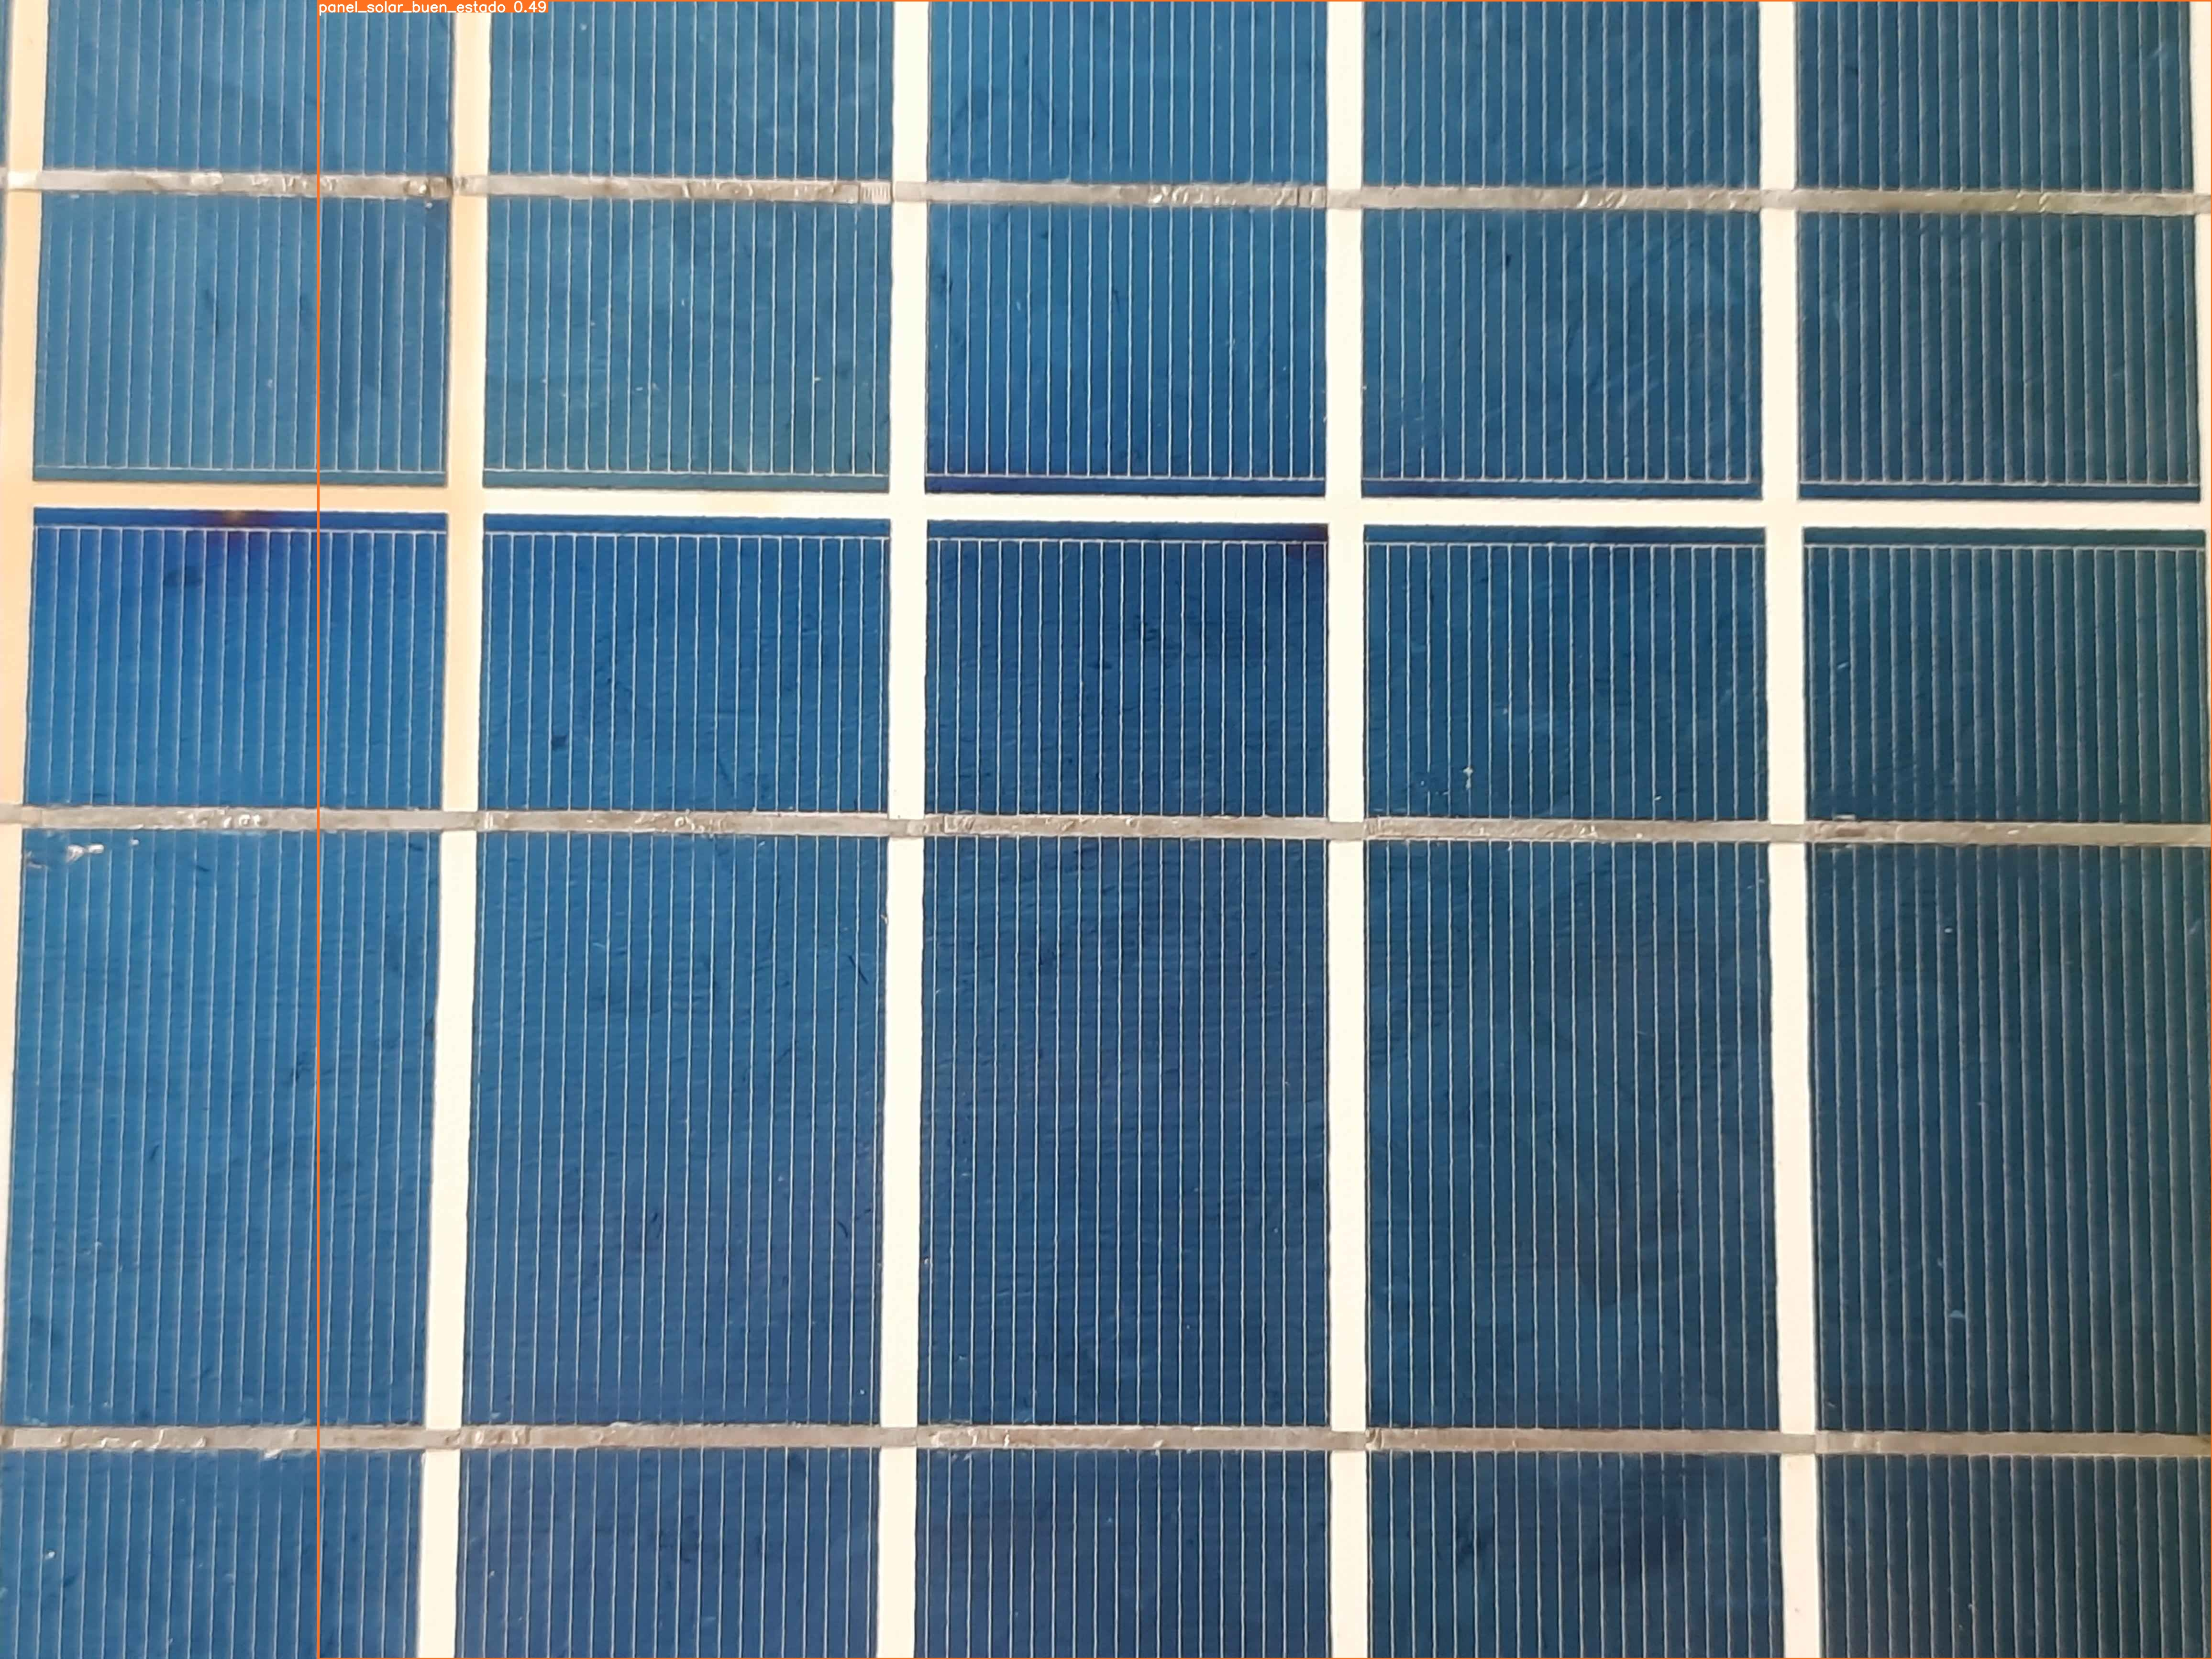

In [ ]:
from IPython.display import Image, display

# Mostrar las imágenes de resultados de detección
display(Image(filename='/content/yolov5/runs/detect/exp2/20210917_151349_11_11zon_42_11zon.jpg'))  # Ajusta el nombre de archivo según sea necesario

##### **Evaluación de Resultados**
El modelo ha funcionado correctamente y ha detectado el panel en buen estado.

#### **Caso 2: Panel Solar Sucio**

##### **Seleccionar Imagen de Prueba**

In [ ]:
from google.colab import files

# Subir nuevas imágenes o vídeos para la inferencia
uploaded = files.upload()

Saving 20210916_130258_29_11zon.jpg to 20210916_130258_29_11zon.jpg


##### **Ejecutar la Inferencia**

Se ejecuta la inferencia utilizando el script de detección de YOLOv5. El script toma como entrada los pesos del modelo entrenado y la nueva imagen, y realiza las detecciones de objetos.

In [ ]:
# Realizar inferencia en las nuevas imágenes subidas
!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --conf 0.25 --source /content/yolov5/20210916_130258_29_11zon.jpg

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/yolov5/20210916_130258_29_11zon.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-323-gdfdfbcf3 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/20210916_130258_29_11zon.jpg: 480x640 1 panel_solar_buen_estado, 102.6ms
Speed: 0.7ms pre-process, 102.6ms inference, 583.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


##### **Visualizar los Resultados**

Los resultados de la inferencia se guardaron en el directorio *runs/detect/exp2*.
A continuación, se muestran la imagen con las detecciones realizadas por el modelo:

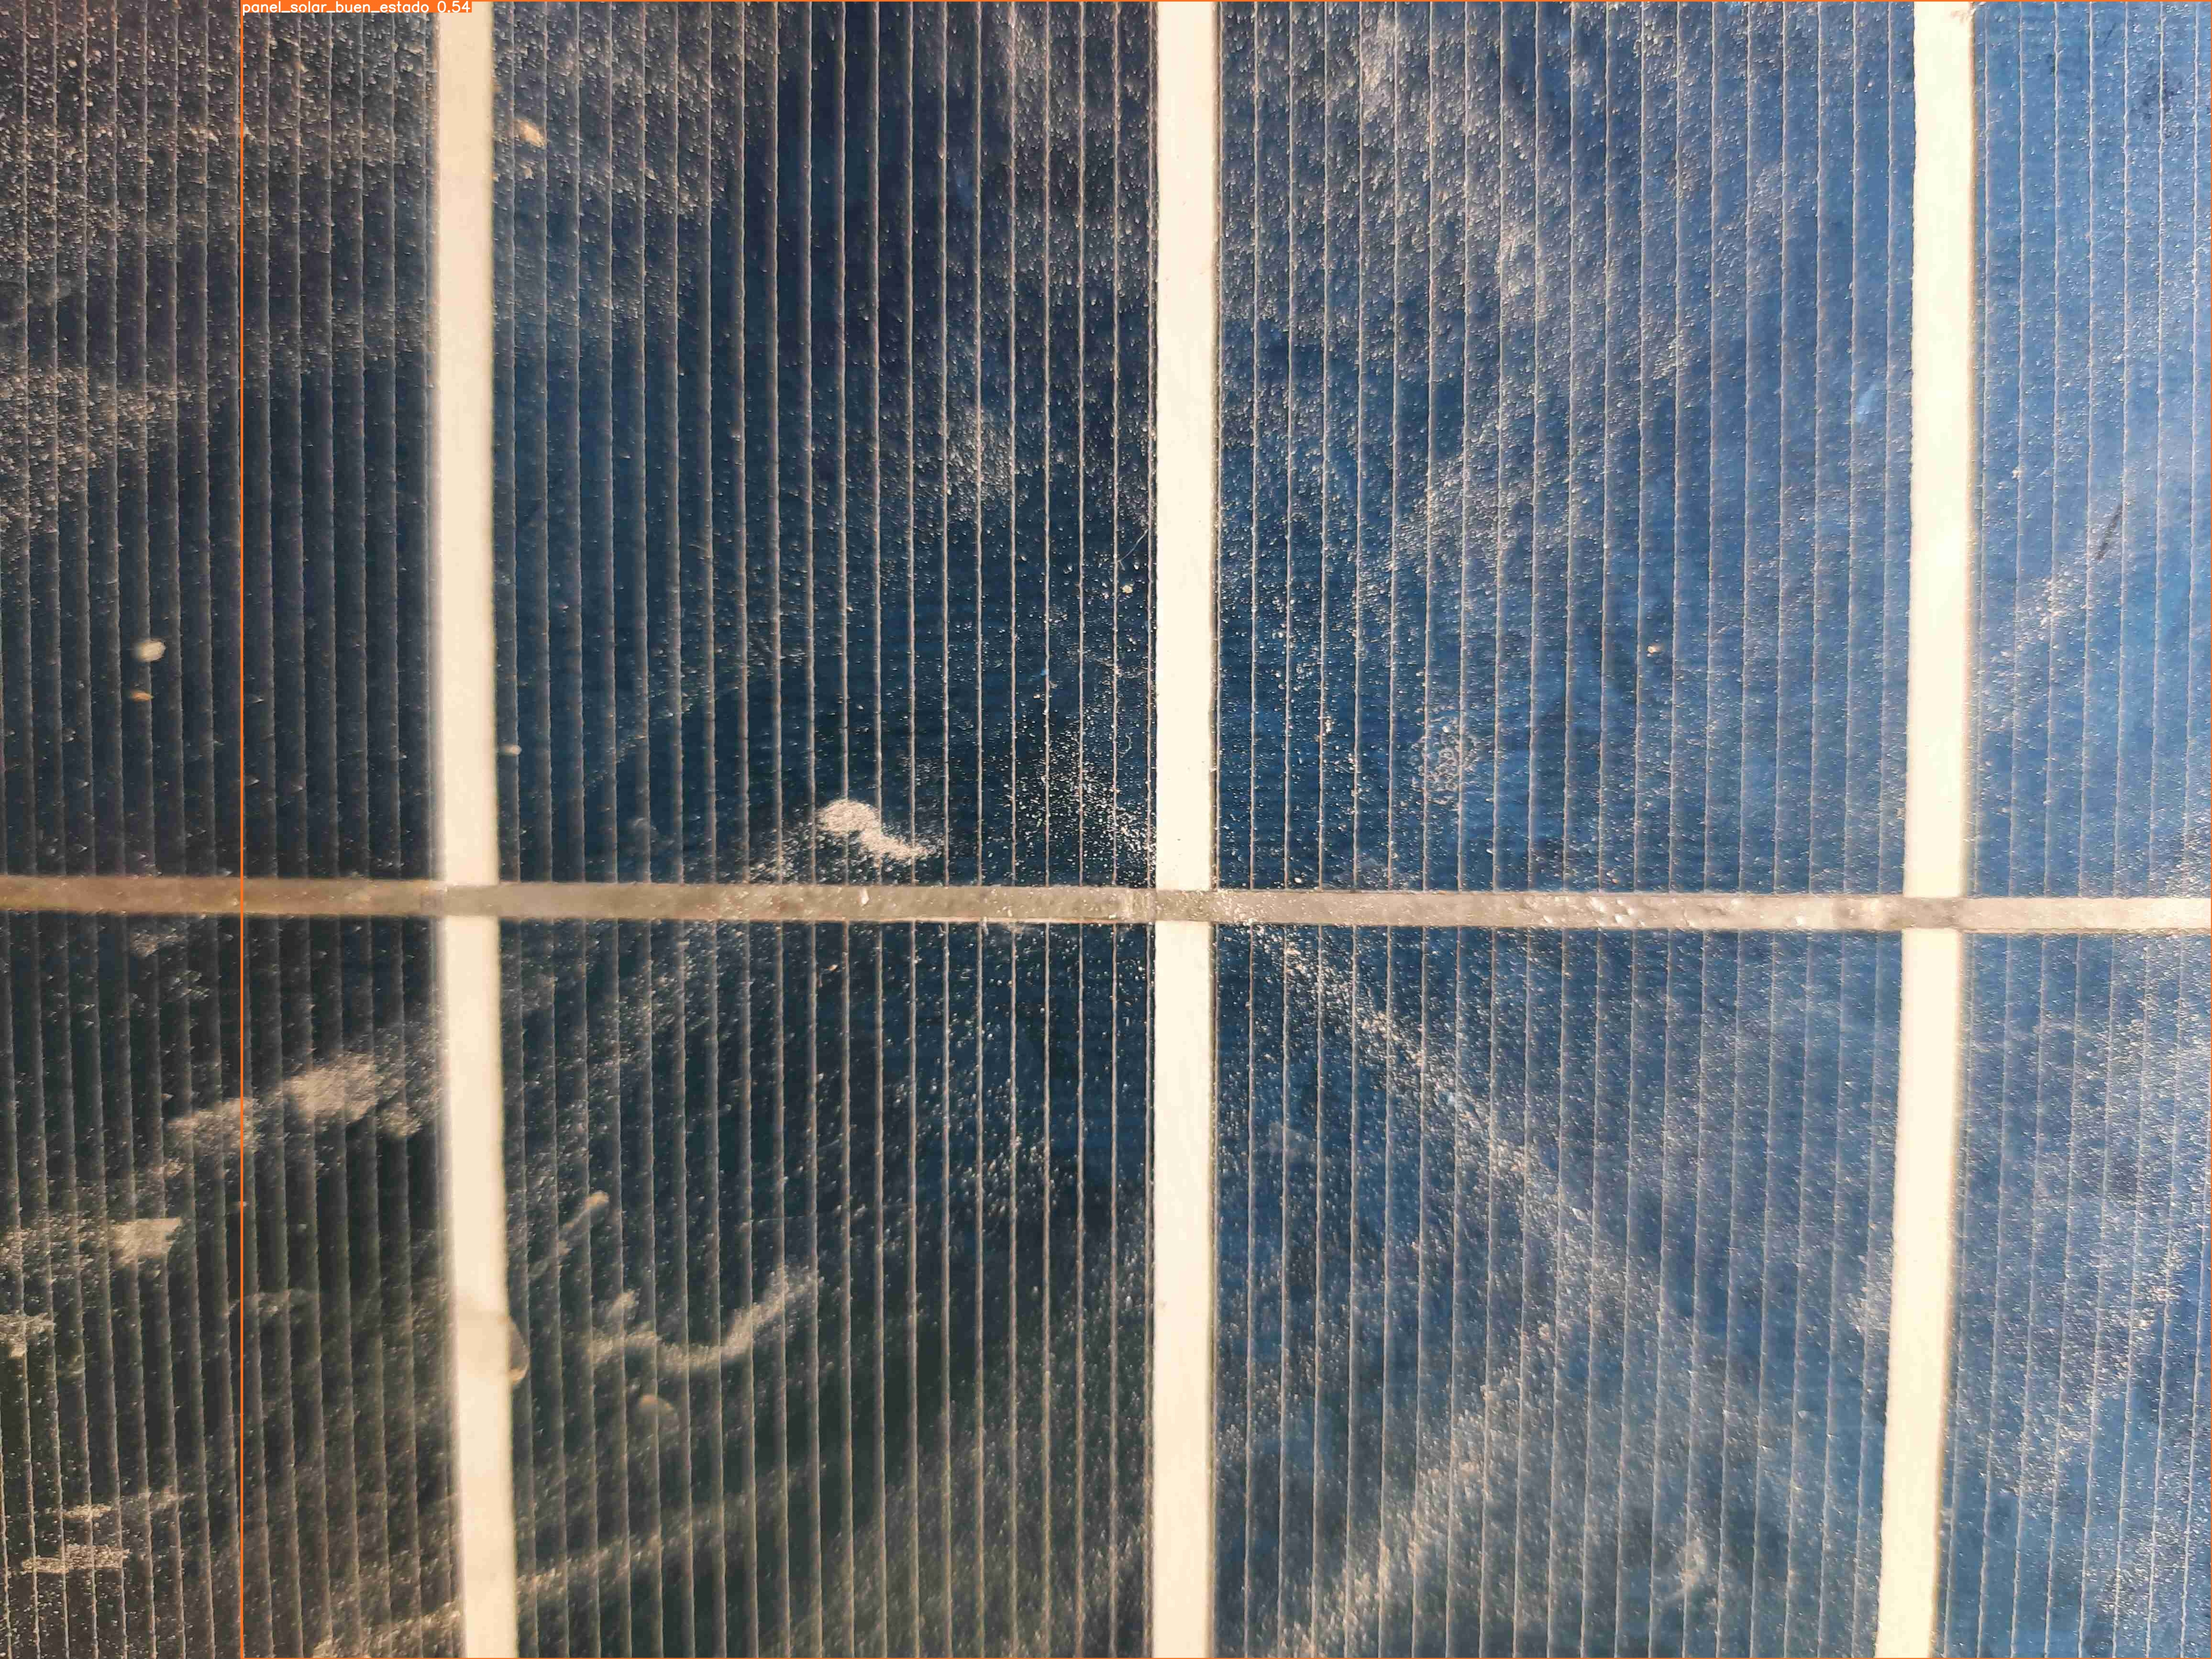

In [ ]:
from IPython.display import Image, display

# Mostrar las imágenes de resultados de detección
display(Image(filename='/content/yolov5/runs/detect/exp3/20210916_130258_29_11zon.jpg'))  # Ajusta el nombre de archivo según sea necesario

##### **Evaluación de Resultados**
El modelo no ha funcionado correctamente y no ha detectado el panel sucio.

#### **Caso 3: Panel Solar Roto**

##### **Seleccionar Imagen de Prueba**

In [ ]:
from google.colab import files

# Subir nuevas imágenes o vídeos para la inferencia
uploaded = files.upload()

Saving panel_roto.jpeg to panel_roto.jpeg


##### **Ejecutar la Inferencia**

Se ejecuta la inferencia utilizando el script de detección de YOLOv5. El script toma como entrada los pesos del modelo entrenado y la nueva imagen, y realiza las detecciones de objetos.

In [ ]:
# Realizar inferencia en las nuevas imágenes subidas
!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --conf 0.25 --source /content/yolov5/panel_roto.jpeg

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/yolov5/panel_roto.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-323-gdfdfbcf3 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/panel_roto.jpeg: 320x640 1 panel_solar_roto, 111.2ms
Speed: 0.5ms pre-process, 111.2ms inference, 688.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


##### **Visualizar los Resultados**

Los resultados de la inferencia se guardaron en el directorio *runs/detect/exp2*.
A continuación, se muestran la imagen con las detecciones realizadas por el modelo:

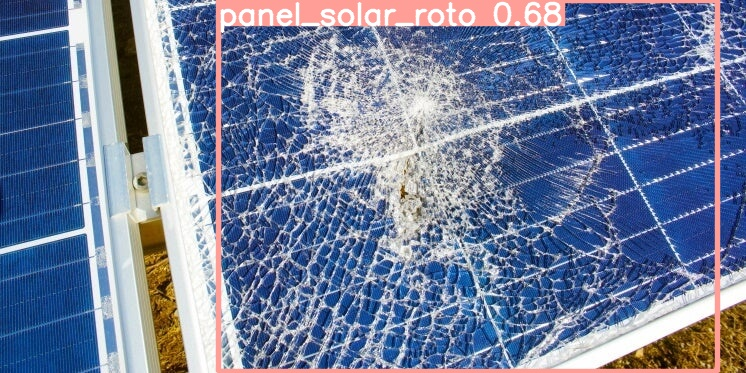

In [ ]:
from IPython.display import Image, display

# Mostrar las imágenes de resultados de detección
display(Image(filename='/content/yolov5/runs/detect/exp4/panel_roto.jpeg'))  # Ajusta el nombre de archivo según sea necesario

##### **Evaluación de Resultados**
El modelo ha funcionado correctamente y ha detectado el panel roto.